# Regression Practice

In [ ]:
import numpy as np
np.random.seed(1234)

## Load Data

In [ ]:
from tensorflow.keras.datasets import boston_housing

(train_input, train_target), (test_input, test_target) = boston_housing.load_data()

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(404, 13) (404,)
(102, 13) (102,)


## Normalization

In [ ]:
train_mean = train_input.mean(axis=0)
train_std = train_input.std(axis=0)

train_input = (train_input - train_mean) / train_std
test_input = (test_input - train_mean) / train_std

## Model Definition

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(train_input.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) # regression에서는 output layer에 activation을 주면 안된다!

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


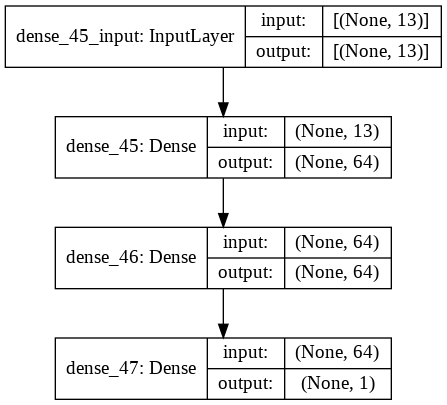

In [ ]:
# CoLab에서 확인할 것!
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## k-Fold Cross Validation을 위해 Model Definition User Defined Function

In [ ]:
def CreateModel():

    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_input.shape[1], )))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1)) # Regression에서는 output layer에서 activation을 주면 안된다!

    model.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae']
    )

    return model

k-Fold Cross Validation (k=4, epochs=100)

In [ ]:
k = 4
val_cnt = len(train_input) // k
epoch_cnt = 50
mae_list = []

for i in range(k):
    
    print('Fold Number', i + 1, 'In Progress...')

    trainval_input = train_input[(i * val_cnt) : ((i + 1) * val_cnt)]
    trainval_target = train_target[(i * val_cnt) : ((i + 1) * val_cnt)]

    traintrain_input = np.concatenate(
        [
         train_input[: (i * val_cnt)],
         train_input[((i + 1) * val_cnt) :]
        ],
        axis=0
    )

    traintrain_target = np.concatenate(
        [
         train_target[: (i * val_cnt)],
         train_target[((i + 1) * val_cnt) :]
        ],
        axis=0
    )

    model = CreateModel()
    model.fit(
        traintrain_input,
        traintrain_target,
        epochs=epoch_cnt,
        batch_size=1,
        verbose=0
    )

    val_mse, val_mae = model.evaluate(trainval_input, trainval_target, verbose=0)
    mae_list.append(val_mae)

Fold Number 1 In Progress...
Fold Number 2 In Progress...
Fold Number 3 In Progress...
Fold Number 4 In Progress...


In [ ]:
print(mae_list)

[2.6897878646850586, 2.3993680477142334, 2.2169103622436523, 2.610442876815796]


In [ ]:
print(np.mean(mae_list))

2.479127287864685


k-Fold Cross Validation (k=4, epochs=500)

In [ ]:
k = 4
val_cnt = len(train_input) // k
epoch_cnt = 100
mae_list = []

for i in range(k):

    print('Fold Number', i + 1, 'In Progress...')

    trainval_input = train_input[(i * val_cnt) : ((i + 1) * val_cnt)]
    trainval_target = train_target[(i * val_cnt) : ((i + 1) * val_cnt)]

    traintrain_input = np.concatenate(
        [
         train_input[: (i * val_cnt)],
         train_input[((i + 1) * val_cnt) :]
        ],
        axis=0
    )

    traintrain_target = np.concatenate(
        [
         train_target[: (i * val_cnt)],
         train_target[((i + 1) * val_cnt) :]
        ],
        axis=0
    )

    model = CreateModel()
    history = model.fit(
        traintrain_input,
        traintrain_target,
        epochs=epoch_cnt,
        batch_size=1,
        validation_data=(trainval_input, trainval_target),
        verbose=0
    )

    mae_per_epoch_list = history.history['val_mae']
    mae_list.append(mae_per_epoch_list)

Fold Number 1 In Progress...
Fold Number 2 In Progress...
Fold Number 3 In Progress...
Fold Number 4 In Progress...


In [ ]:
import pandas as pd

mae_df = pd.DataFrame(mae_list)
mae_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,3.875313,3.171316,2.961359,2.576292,2.486784,2.262288,2.434501,2.394971,2.047602,1.961439,2.032619,2.042892,2.131265,2.011169,2.152356,2.201914,1.930356,2.024189,2.073627,2.018560,1.893594,1.828913,2.180913,1.924406,1.991053,1.908127,1.945743,1.914396,2.201795,2.144199,1.954360,2.301018,2.028597,1.808981,1.783276,2.206601,2.513896,2.026529,1.905884,1.980006,...,2.192585,1.928628,1.866864,2.122983,2.095757,1.903845,2.168409,2.990391,2.158824,2.272976,1.927527,1.991161,2.703219,1.924280,2.266839,2.321978,1.957097,2.028050,2.107123,2.322636,2.260092,1.967627,2.117336,2.193089,1.927139,2.073088,1.987599,1.946628,1.981477,2.098511,2.021245,2.062715,2.052076,2.031852,2.446971,2.243283,1.992615,2.244889,2.094457,2.213640
1,4.295457,3.673401,2.982302,3.064782,2.779463,2.748838,2.708535,2.645728,2.772058,2.624766,2.738325,2.550275,2.637702,2.524701,2.574328,2.478040,2.784191,2.558778,2.648429,2.539827,2.581564,2.543849,2.434432,2.480187,2.768261,2.493842,2.628611,2.552964,2.520714,2.629133,2.384301,2.351926,2.399775,2.367945,2.382133,2.389575,2.954673,2.354950,2.780167,2.576664,...,2.195921,2.510704,2.813677,2.192534,2.660633,2.764206,2.350691,2.309182,2.247905,2.395374,2.956768,2.570385,2.397645,2.482288,2.709493,2.446867,2.460823,2.372504,2.715945,2.354480,2.651686,2.322456,2.277214,2.742161,2.200918,2.429887,2.300389,2.576398,2.513644,2.519583,2.548615,2.432562,2.311958,2.707088,2.269235,2.461841,2.702238,2.536932,2.391417,2.490724
2,4.337447,3.505231,2.772367,2.792030,2.579923,2.744363,2.816318,2.634364,2.511409,2.594768,2.483371,2.538603,2.486778,2.595158,2.756100,2.471310,2.462419,2.597862,2.609612,2.595329,2.688586,2.693875,2.582651,2.515477,2.577442,2.471479,2.494634,2.449500,2.825073,2.501117,2.536264,2.694160,2.608432,2.522955,2.520279,2.386178,2.514556,2.473616,2.550451,2.474967,...,2.686531,2.629421,2.599568,2.460479,2.411552,2.582774,2.495072,2.400492,2.393154,2.721359,2.605994,2.547066,2.574884,2.822849,2.531789,2.841180,2.679027,2.677359,2.969486,2.709373,2.535697,2.814432,2.885116,2.573794,2.595714,2.561898,2.623866,2.485413,2.579938,2.684138,2.616386,2.654716,2.670630,2.863034,2.693083,2.698960,2.587467,2.723443,2.580451,2.705249
3,6.064450,3.759485,3.092628,3.072144,3.291589,2.870820,3.022714,2.521239,2.530258,2.475611,2.665672,2.521425,2.653978,2.508431,2.388225,2.522671,2.865124,2.429748,2.561220,2.345174,2.728462,2.371934,2.284580,2.483006,2.268638,2.492190,2.295803,2.373688,2.261975,2.452728,2.392559,2.275446,2.444626,2.472607,2.559103,2.477458,2.532698,2.368407,2.412301,2.595749,...,2.250048,2.353243,2.264023,2.326269,2.382632,2.218594,2.565651,2.399742,2.389178,2.558316,2.366356,2.297183,2.379402,2.374092,2.236183,2.252119,2.331792,2.347918,2.537270,2.269034,2.420772,2.380059,2.368823,2.249341,2.334248,2.232195,2.213394,2.240263,2.271610,2.223833,2.352678,2.334400,2.243693,2.202177,2.535600,2.344780,2.274602,2.361854,2.249475,2.323666


In [ ]:
mae_mean_list = list(np.mean(mae_df, axis=0))
mae_mean_list

[4.643166720867157,
 3.5273582339286804,
 2.9521641731262207,
 2.876311779022217,
 2.7844395637512207,
 2.6565773487091064,
 2.7455170154571533,
 2.549075424671173,
 2.4653316736221313,
 2.414146304130554,
 2.479996919631958,
 2.4132986664772034,
 2.4774307012557983,
 2.409864842891693,
 2.4677523970603943,
 2.418483793735504,
 2.5105223953723907,
 2.4026443362236023,
 2.4732221961021423,
 2.374722421169281,
 2.4730513989925385,
 2.359642505645752,
 2.37064391374588,
 2.3507689237594604,
 2.40134859085083,
 2.3414094150066376,
 2.341197669506073,
 2.322636902332306,
 2.4523894786834717,
 2.4317941665649414,
 2.3168709576129913,
 2.4056374430656433,
 2.370357632637024,
 2.2931221425533295,
 2.3111976385116577,
 2.36495304107666,
 2.6289557218551636,
 2.3058754801750183,
 2.4122007489204407,
 2.406846761703491,
 2.5141929388046265,
 2.4040841460227966,
 2.3822816610336304,
 2.2591274678707123,
 2.5860543847084045,
 2.335595428943634,
 2.353786677122116,
 2.257536381483078,
 2.41867971420

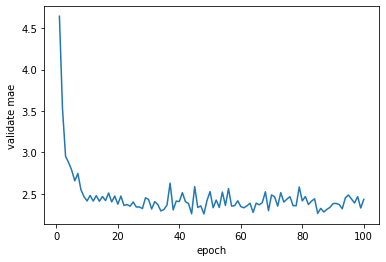

''

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, epoch_cnt + 1, 1), mae_mean_list)

plt.xlabel('epoch')
plt.ylabel('validate mae')

plt.show()
;

Smoothing Curve

In [ ]:
def MakeSmooth(point_list, factor=0.1):
    smoothpoint_list = []

    for point in point_list:
        if smoothpoint_list:
            previous_point = smoothpoint_list[-1]
            smoothpoint_list.append(previous_point * (1 - factor) + point * factor)
        else:
            smoothpoint_list.append(point)

    return smoothpoint_list

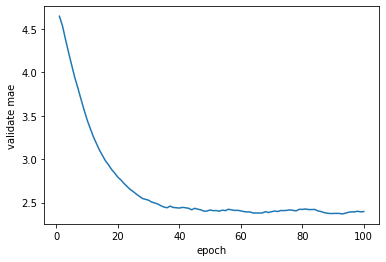

''

In [ ]:
mae_mean_list = MakeSmooth(mae_mean_list)

plt.plot(range(1, epoch_cnt + 1, 1), mae_mean_list)

plt.xlabel('epoch')
plt.ylabel('validate mae')

plt.show()
;

Final Model (epoch=70)

In [ ]:
model = CreateModel()
model.fit(
    train_input,
    train_target,
    epochs=70,
    batch_size=16
)

Epoch 1/70
26/26 [==============================] - 1s 3ms/step - loss: 504.1770 - mae: 20.4833
Epoch 2/70
26/26 [==============================] - 0s 3ms/step - loss: 337.0815 - mae: 16.2529
Epoch 3/70
26/26 [==============================] - 0s 3ms/step - loss: 172.9233 - mae: 10.8584
Epoch 4/70
26/26 [==============================] - 0s 3ms/step - loss: 76.3162 - mae: 6.7392
Epoch 5/70
26/26 [==============================] - 0s 3ms/step - loss: 44.7205 - mae: 5.0507
Epoch 6/70
26/26 [==============================] - 0s 3ms/step - loss: 32.1280 - mae: 4.1504
Epoch 7/70
26/26 [==============================] - 0s 2ms/step - loss: 26.5089 - mae: 3.7243
Epoch 8/70
26/26 [==============================] - 0s 3ms/step - loss: 23.3781 - mae: 3.3805
Epoch 9/70
26/26 [==============================] - 0s 3ms/step - loss: 21.2418 - mae: 3.2966
Epoch 10/70
26/26 [==============================] - 0s 2ms/step - loss: 19.1855 - mae: 3.0923
Epoch 11/70
26/26 [==============================] - 

In [ ]:
import numpy as np

test_mse, test_mae = model.evaluate(test_input, test_target)
print('MSE:', np.round(test_mse, 4))
print('MAE:', np.round(test_mae, 4))

4/4 [==============================] - 0s 3ms/step - loss: 17.7384 - mae: 2.7016
MSE: 17.7384
MAE: 2.7016
